In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-90.000, high=90.000, size=150)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add coordinates to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

100

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc797a2fbf4b1b0fbfc5ab3d82b4397c


In [8]:
# Import the time library and the datetime odule from the datetime library
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginnng of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | kyela
Processing Record 4 of Set 1 | nsoko
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | maturin
Processing Record 7 of Set 1 | brigantine
Processing Record 8 of Set 1 | garowe
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | limanowa
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | vardo
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | saint george
Processing Record 22 of

In [11]:
print(len(city_data))

90


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.78,95,52,5.03,AR,2023-03-08 05:15:25
1,Kyela,-9.5833,33.8500,71.76,91,100,0.67,TZ,2023-03-08 05:20:14
2,Nsoko,-27.0333,31.9500,70.03,86,22,0.49,SZ,2023-03-08 05:20:15
3,Punta Arenas,-53.1500,-70.9167,41.11,65,37,6.64,CL,2023-03-08 05:20:16
4,Maturin,9.7500,-63.1767,75.04,94,94,3.44,VE,2023-03-08 05:20:16
5,Brigantine,39.4101,-74.3646,38.01,55,0,17.27,US,2023-03-08 05:20:17
6,Garowe,8.4054,48.4845,71.11,74,54,13.69,SO,2023-03-08 05:20:17
7,Bambous Virieux,-20.3428,57.7575,82.65,69,75,10.36,MU,2023-03-08 05:20:18
8,Nanortalik,60.1432,-45.2371,25.38,75,54,6.71,GL,2023-03-08 05:20:19
9,Chuy,-33.6971,-53.4616,71.33,96,74,2.71,UY,2023-03-08 05:20:19


In [13]:
# Reorder the columns in the DataFrame
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2023-03-08 05:15:25,-54.8000,-68.3000,35.78,95,52,5.03
1,Kyela,TZ,2023-03-08 05:20:14,-9.5833,33.8500,71.76,91,100,0.67
2,Nsoko,SZ,2023-03-08 05:20:15,-27.0333,31.9500,70.03,86,22,0.49
3,Punta Arenas,CL,2023-03-08 05:20:16,-53.1500,-70.9167,41.11,65,37,6.64
4,Maturin,VE,2023-03-08 05:20:16,9.7500,-63.1767,75.04,94,94,3.44
5,Brigantine,US,2023-03-08 05:20:17,39.4101,-74.3646,38.01,55,0,17.27
6,Garowe,SO,2023-03-08 05:20:17,8.4054,48.4845,71.11,74,54,13.69
7,Bambous Virieux,MU,2023-03-08 05:20:18,-20.3428,57.7575,82.65,69,75,10.36
8,Nanortalik,GL,2023-03-08 05:20:19,60.1432,-45.2371,25.38,75,54,6.71
9,Chuy,UY,2023-03-08 05:20:19,-33.6971,-53.4616,71.33,96,74,2.71


In [14]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

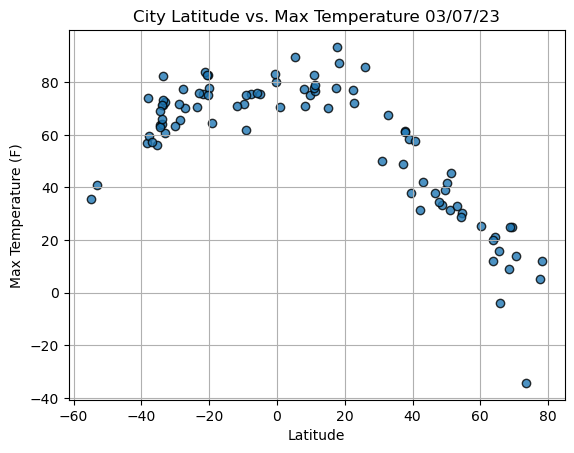

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

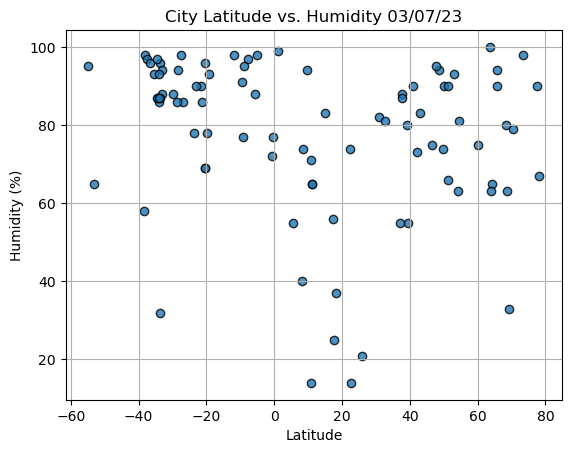

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

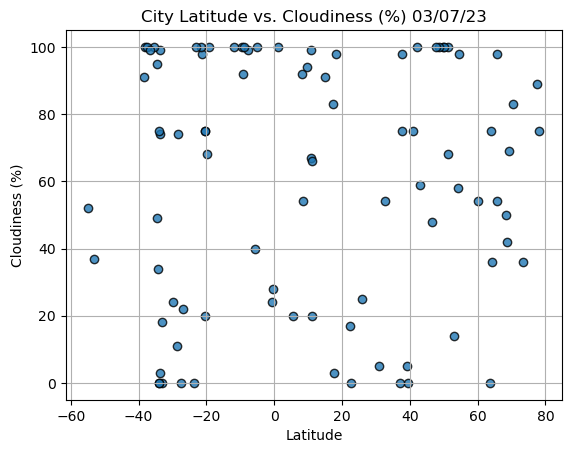

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

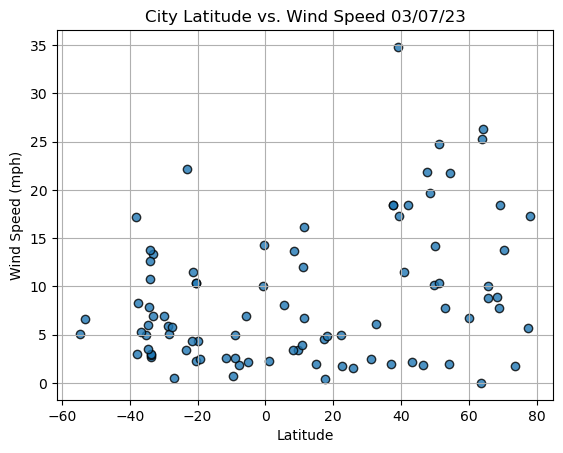

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the date
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2023-03-08 05:20:23
Lat                       63.7506
Lng                      -68.5145
Max Temp                    11.93
Humidity                      100
Cloudiness                      0
Wind Speed                    0.0
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0     False
1     False
2     False
3     False
4      True
      ...  
85    False
86     True
87     True
88     True
89    False
Name: Lat, Length: 90, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Maturin,VE,2023-03-08 05:20:16,9.7500,-63.1767,75.04,94,94,3.44
5,Brigantine,US,2023-03-08 05:20:17,39.4101,-74.3646,38.01,55,0,17.27
6,Garowe,SO,2023-03-08 05:20:17,8.4054,48.4845,71.11,74,54,13.69
8,Nanortalik,GL,2023-03-08 05:20:19,60.1432,-45.2371,25.38,75,54,6.71
10,Limanowa,PL,2023-03-08 05:20:20,49.7059,20.4220,39.15,74,100,10.13
11,Ilulissat,GL,2023-03-08 05:20:21,69.2167,-51.1000,24.82,33,69,18.41
12,Hofn,IS,2023-03-08 05:20:22,64.2539,-15.2082,21.07,65,36,26.28
13,Iqaluit,CA,2023-03-08 05:20:23,63.7506,-68.5145,11.93,100,0,0.00
14,Vardo,NO,2023-03-08 05:20:23,70.3705,31.1107,13.98,79,83,13.80
15,Dingle,PH,2023-03-08 05:20:24,10.9995,122.6711,82.69,71,67,11.99


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Maturin,VE,2023-03-08 05:20:16,9.7500,-63.1767,75.04,94,94,3.44
5,Brigantine,US,2023-03-08 05:20:17,39.4101,-74.3646,38.01,55,0,17.27
6,Garowe,SO,2023-03-08 05:20:17,8.4054,48.4845,71.11,74,54,13.69
8,Nanortalik,GL,2023-03-08 05:20:19,60.1432,-45.2371,25.38,75,54,6.71
10,Limanowa,PL,2023-03-08 05:20:20,49.7059,20.4220,39.15,74,100,10.13


In [25]:
# Create Northern and Southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

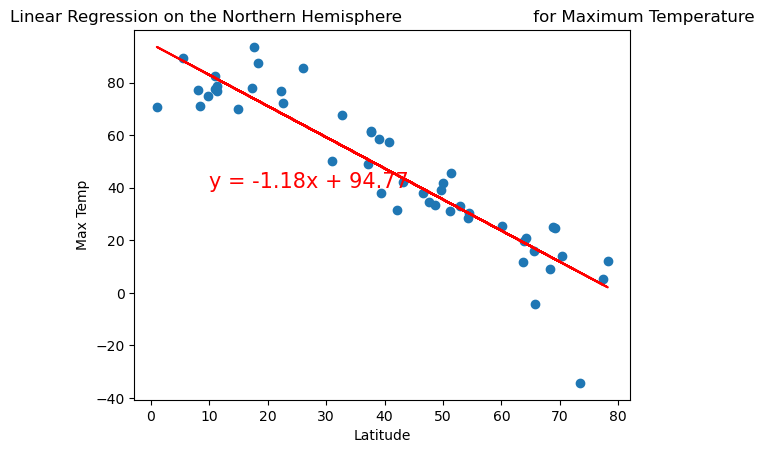

In [26]:
# Import linear regression from teh SciPy stats module
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

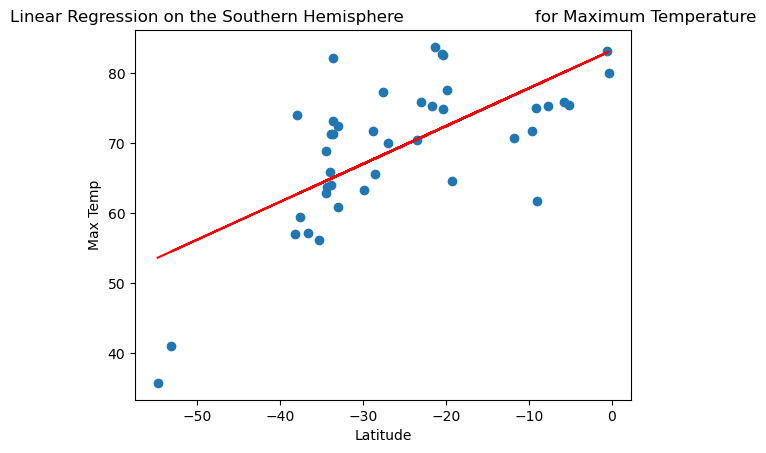

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

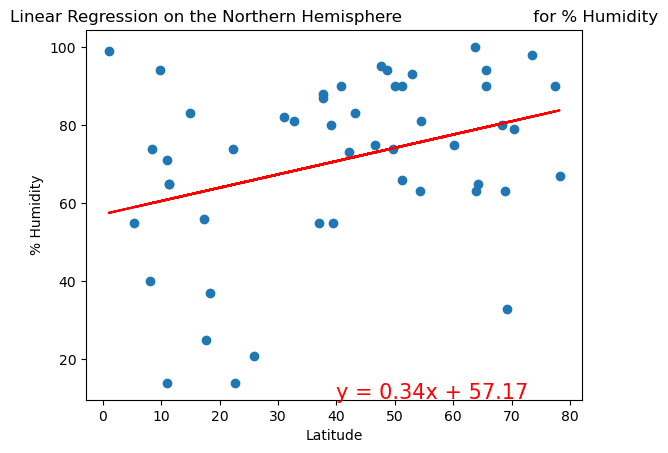

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

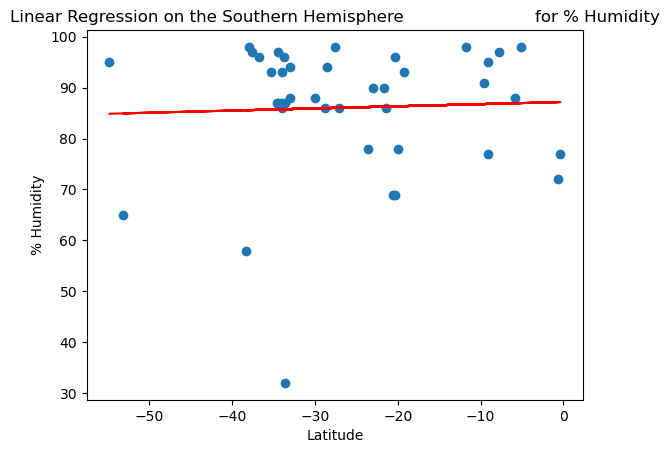

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

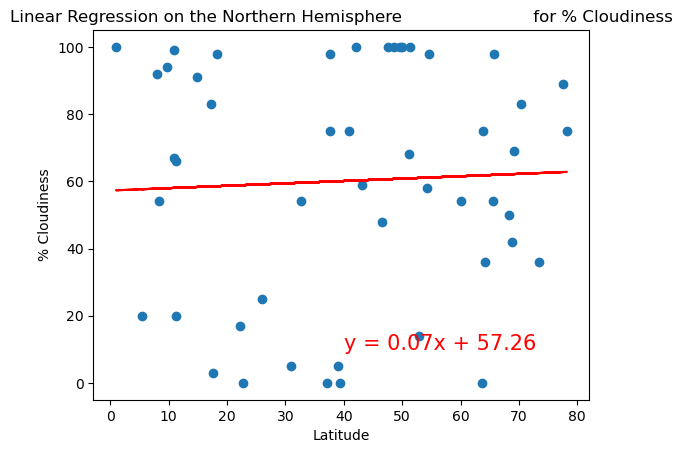

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

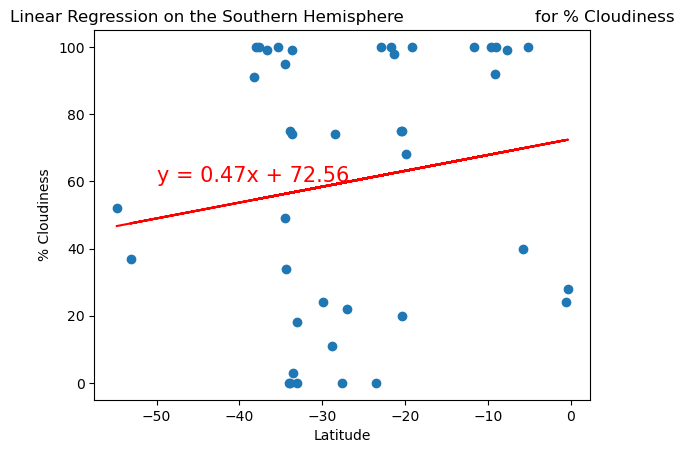

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

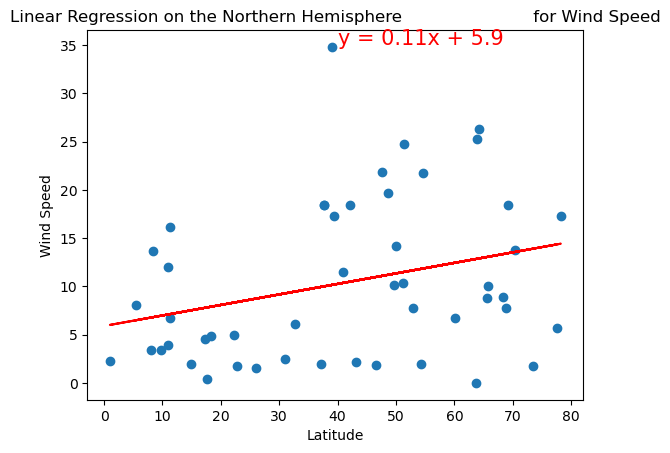

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

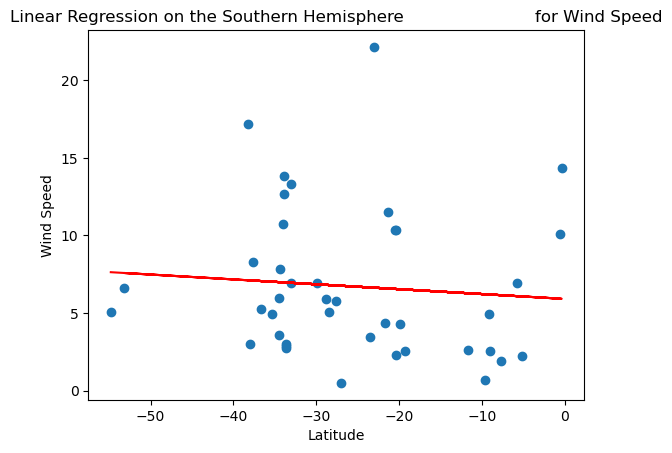

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))